# Visualization of AMSIMP & Benchmarking Experiments

This notebook will generate scatter plots of various profiles of the Earth's Troposphere and Stratosphere using AMSIMP. An example of such a profile would be plotting an ***Atmospheric Pressure - Altitude*** scatter plot based on the Barometric Pressure Formula. This notebook will also output the run time of AMSIMP using different levels of simulation detail. 

In [1]:
#Import dependencies.
import os
#Allows Jupyter Notebook to access the AMSIMP module on GitHub.
os.chdir(os.path.dirname(os.getcwd()))
#Import the rest of the dependencies.
import matplotlib.pyplot as plt
import amsimp
import pandas as pd
import numpy as np
import pylab

In [2]:
#Defines the level of detail for the notebook
detail = amsimp.Dynamics(4)

## Scatter Plots Generated from AMSIMP 

> Important Note: While the graphs seem to imply that the velocity of zonal, and meridional winds at the equator tends towards infinity, in fact the opposite is true, as the two opposing  vectors in each case cancel each other out.

### Latitude - Zonal Wind Scatter Plot (At Sea Level)

(-100, 100)

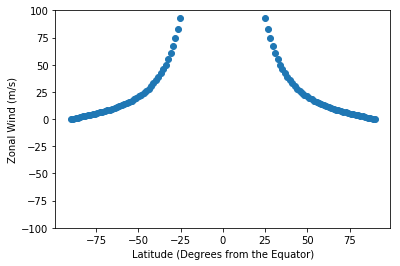

In [3]:
plt.scatter(detail.latitude_lines(), detail.zonal_wind()[0])
plt.xlabel('Latitude (Degrees from the Equator)')
plt.ylabel('Zonal Wind (m/s)')
plt.ylim(-100, 100)

### Latitude - Meridional Wind Scatter Plot (At Sea Level)

(-100, 100)

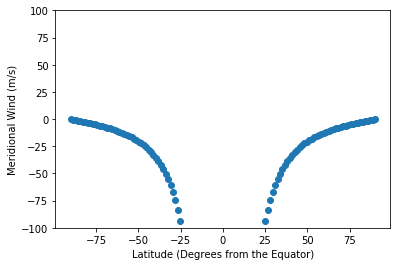

In [4]:
plt.scatter(detail.latitude_lines(), detail.meridional_wind()[0])
plt.xlabel('Latitude (Degrees from the Equator)')
plt.ylabel('Meridional Wind (m/s)')
plt.ylim(-100, 100)

### Latitude - Zonal Velocity Scatter Plot (At Sea Level)

(-100, 100)

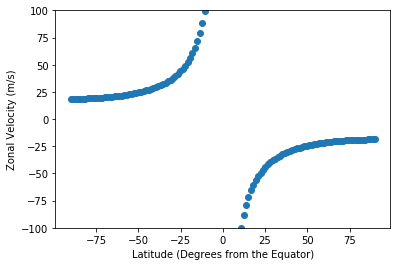

In [5]:
plt.scatter(detail.latitude_lines(), detail.zonal_velocity()[0])
plt.xlabel('Latitude (Degrees from the Equator)')
plt.ylabel('Zonal Velocity (m/s)')
plt.ylim(-100, 100)

### Latitude - Meridional Velocity Scatter Plot (At Sea Level)

(-100, 100)

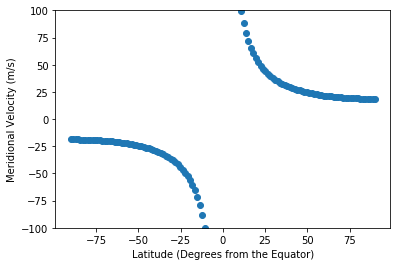

In [6]:
plt.scatter(detail.latitude_lines(), detail.meridional_velocity()[0])
plt.xlabel('Latitude (Degrees from the Equator)')
plt.ylabel('Meridional Velocity (m/s)')
plt.ylim(-100, 100)

### Altitude - Vertical Velocity Scatter Plot

Text(0, 0.5, 'Vertical Velocity (Pa / s)')

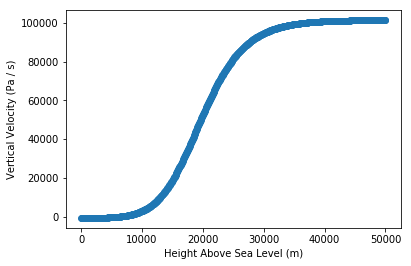

In [7]:
plt.scatter(detail.altitude_level(), detail.vertical_velocity())
plt.xlabel('Height Above Sea Level (m)')
plt.ylabel('Vertical Velocity (Pa / s)')

### Altitude - Temperature (Standard Atmosphere Calculation) Scatter Plot

Text(0, 0.5, 'Temperature (K)')

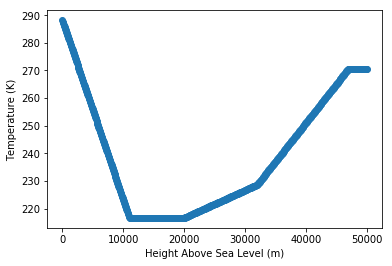

In [8]:
plt.scatter(detail.altitude_level(), detail.temperature())
plt.xlabel('Height Above Sea Level (m)')
plt.ylabel('Temperature (K)')

### Altitude - Atmospheric Pressure Scatter Plot (Barometric Formula)

Text(0, 0.5, 'Atmospheric Pressure (Pa)')

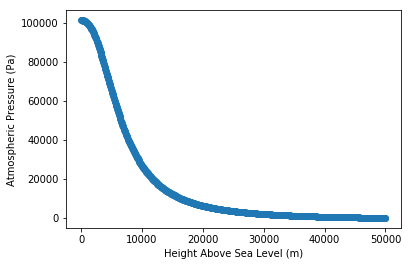

In [9]:
plt.scatter(detail.altitude_level(), detail.pressure())
plt.xlabel('Height Above Sea Level (m)')
plt.ylabel('Atmospheric Pressure (Pa)')

### Latitude - Coriolis Force Scatter Plot

Text(0, 0.5, 'Coriolis Force (Radians / s)')

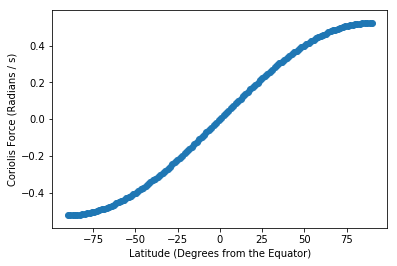

In [10]:
plt.scatter(detail.latitude_lines(), detail.coriolis_force())
plt.xlabel('Latitude (Degrees from the Equator)')
plt.ylabel('Coriolis Force (Radians / s)')

### Altitude - Geopotential Scatter Plot

Text(0, 0.5, 'Geopotential (J / kg)')

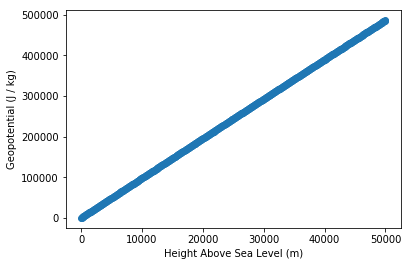

In [11]:
plt.scatter(detail.altitude_level(), detail.geopotential())
plt.xlabel('Height Above Sea Level (m)')
plt.ylabel('Geopotential (J / kg)')

### Altitude - Potential Temperature Scatter Plot

Text(0, 0.5, 'Potential Temperature (K)')

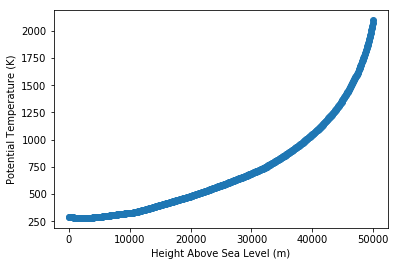

In [12]:
plt.scatter(detail.altitude_level(), detail.potential_temperature())
plt.xlabel('Height Above Sea Level (m)')
plt.ylabel('Potential Temperature (K)')

### Altitude - Exner Function Scatter Plot

Text(0, 0.5, 'Exner Function')

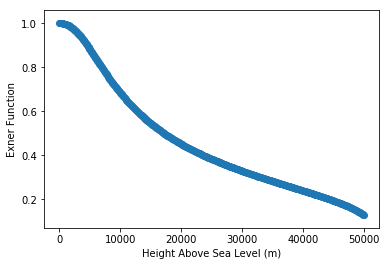

In [13]:
plt.scatter(detail.altitude_level(), detail.exner_function())
plt.xlabel('Height Above Sea Level (m)')
plt.ylabel('Exner Function')

## Benchmarking Results

In [14]:
data_mac = pd.read_csv('benchmarking/macos_benchmark.csv')

max_detail_level = 5

data_mac = data_mac.sort_values(['detail_level', 'time'], ascending = [True, True])

In [15]:
data_vm = pd.read_csv('benchmarking/vm_benchmark.csv')

data_vm = data_vm.sort_values(['detail_level', 'time'], ascending = [True, True])

In [16]:
data_windows = pd.read_csv('benchmarking/windows_benchmark.csv')

data_windows = data_windows.sort_values(['detail_level', 'time'], ascending = [True, True])

In [17]:
data_linux = pd.read_csv('benchmarking/linux_benchmark.csv')

data_linux = data_linux.sort_values(['detail_level', 'time'], ascending = [True, True])

### AMSIMP Mean Performance Benchmark

[0.8677732753753662, 0.8669598460197449, 0.8813429880142212, 1.1853901314735413, 8.040734741687775]
[1.5434540343284606, 1.5642722368240356, 1.5990732026100158, 2.0540428924560548, 13.31686939716339]
[0.8196368479728698, 0.8084970355033875, 0.8193482375144958, 1.0354949808120728, 5.944160673618317]
[2.940872826576233, 2.901238884925842, 2.934784882068634, 3.4716109919548033, 15.303860659599303]


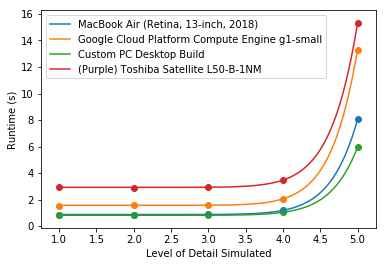

In [18]:
mean_mac = []
mean_vm = []
mean_windows = []
mean_linux = []

# Mac Machine 
for detail in range(max_detail_level):
    mean_mac.append(data_mac[(data_mac['detail_level'] == detail + 1)]['time'].mean())
 
# VM
for detail in range(max_detail_level):
    mean_vm.append(data_vm[(data_vm['detail_level'] == detail + 1)]['time'].mean())

# Windows Machine     
for detail in range(max_detail_level):
    mean_windows.append(data_windows[(data_windows['detail_level'] == detail + 1)]['time'].mean())
    
# Linux
for detail in range(max_detail_level):
    mean_linux.append(data_linux[(data_linux['detail_level'] == detail + 1)]['time'].mean())
    
detail_level = np.arange(1, max_detail_level + 1)

x = np.linspace(1, 5, 100)

y_mac = 206024.4 + (0.8700688 - 206024.4) / (1 + (x / 10.41067) ** 13.99756)
y_vm = 407660.2 + (1.56591 - 407660.2) / (1 + (x / 10.41461) ** 14.24725)
y_windows = 36317.67 + (0.814533 - 36317.67)/(1 + (x / 9.378912) ** 14.093)
y_linux = 101400 + (2.922287 - 101400) / (1 + (x / 9.53397) ** 13.96056)

plt.plot(x, y_mac, label = 'MacBook Air (Retina, 13-inch, 2018)')
plt.scatter(detail_level, mean_mac)

plt.plot(x, y_vm, label = 'Google Cloud Platform Compute Engine g1-small')
plt.scatter(detail_level, mean_vm)

plt.plot(x, y_windows, label = 'Custom PC Desktop Build')
plt.scatter(detail_level, mean_windows)

plt.plot(x, y_linux, label = "(Purple) Toshiba Satellite L50-B-1NM")
plt.scatter(detail_level, mean_linux)

plt.xlabel('Level of Detail Simulated')
plt.ylabel('Runtime (s)')
pylab.legend(loc='upper left')

print(mean_mac)
print(mean_vm)
print(mean_windows)
print(mean_linux)

### AMSIMP Median Performance Benchmark

[0.8465155363082886, 0.8559813499450684, 0.8664209842681885, 1.1533485651016235, 7.91922652721405]
[1.5865989923477173, 1.6994423866271973, 1.7186657190322876, 2.2111334800720215, 14.00655972957611]
[0.8092069625854492, 0.8121541738510132, 0.8173180818557739, 1.035574197769165, 5.943731784820557]
[2.890147089958191, 2.891504406929016, 2.920065402984619, 3.44909405708313, 15.28675627708435]


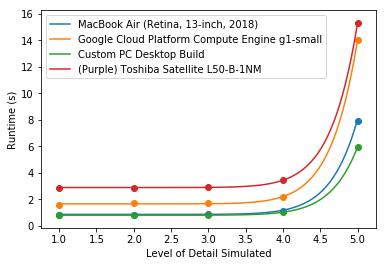

In [19]:
median_mac = []
median_vm = []
median_windows = []
median_linux = []

# Mac Machine 
for detail in range(max_detail_level):
    median_mac.append(data_mac[(data_mac['detail_level'] == detail + 1)]['time'].median())
 
# VM
for detail in range(max_detail_level):
    median_vm.append(data_vm[(data_vm['detail_level'] == detail + 1)]['time'].median())

# Windows Machine     
for detail in range(max_detail_level):
    median_windows.append(data_windows[(data_windows['detail_level'] == detail + 1)]['time'].median())
    
# Linux
for detail in range(max_detail_level):
    median_linux.append(data_linux[(data_linux['detail_level'] == detail + 1)]['time'].median())
    
detail_level = np.arange(1, max_detail_level + 1)

y_mac = 206024.4 + (0.8700688 - 206024.4) / (1 + (x / 10.41067) ** 13.99756)
y_vm = 513686.2 + (1.66432 - 513686.2) / (1 + (x / 10.71648) ** 13.95211)
y_windows = 68352.36 + (0.8115461 - 68352.36) / (1 + ( x / 9.837596) ** 14.03249)
y_linux = 438270.7 + (2.897044 - 438270.7) / (1 + (x / 10.60071) ** 13.93737)

plt.plot(x, y_mac, label = 'MacBook Air (Retina, 13-inch, 2018)')
plt.scatter(detail_level, median_mac)

plt.plot(x, y_vm, label = 'Google Cloud Platform Compute Engine g1-small')
plt.scatter(detail_level, median_vm)

plt.plot(x, y_windows, label = 'Custom PC Desktop Build')
plt.scatter(detail_level, median_windows)

plt.plot(x, y_linux, label = "(Purple) Toshiba Satellite L50-B-1NM")
plt.scatter(detail_level, median_linux)

plt.xlabel('Level of Detail Simulated')
plt.ylabel('Runtime (s)')
pylab.legend(loc='upper left')

print(median_mac)
print(median_vm)
print(median_windows)
print(median_linux)